40.95760221444959
xxxxxxxxxxxxxxxxxxxxxxxxxxx
Total Airtime :  5.82999999999992  s
Height Maximum:  41.79405290725263  m
Range         :  238.7828209102435  m
xxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxx
Total Airtime :  2.5599999999999894  s
Height Maximum:  18.352923033019472  m
Range         :  46.4666727629747  m
xxxxxxxxxxxxxxxxxxxxxxxxxxx
**************************
Total Airtime :  5.84923961198293
Height Maximum:  41.9373251500568
Range         :  239.5708292845983
**************************


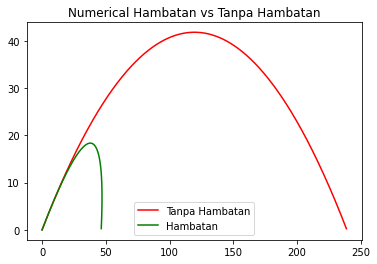

--------------------------



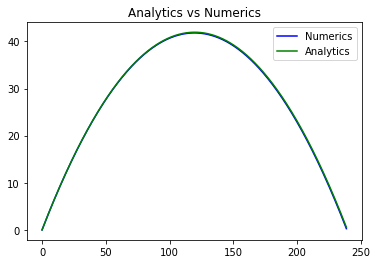

In [1]:
#import some libs

import numpy as np
import matplotlib.pyplot as pl
import math

#%%
#defines some given values
mass = 0.15
v0 = 50
deg = 35
rad = math.radians(deg)
d = 0.0013
dt = 0.01
g = 9.806
vx = v0*np.cos(rad)
vy = v0*np.sin(rad)
print(vx)


#%%
#numerical calculation here (without drag)...

ax = 0
ay = -g
x,y,t = 0,0,0
arr_x,arr_y,arr_t = [x],[y],[t]

while y>=0:
    vx = vx + ax*dt
    vy = vy + ay*dt
    x = x + vx*dt
    y = y + vy*dt
    t = t+dt
    if y <= 0 :
        break
    arr_x.append(x)
    arr_y.append(y)
    arr_t.append(t)

t_tot = arr_t[-1]
h_max = np.max(arr_y)
r_max = arr_x[-1]

print("xxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("Total Airtime : ",t_tot," s")
print("Height Maximum: ",h_max," m")
print("Range         : ",r_max," m")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxx")


#%%
#numerical calculation here ...
vxd = v0*np.cos(rad)
vyd = v0*np.sin(rad)
vd = math.sqrt((vxd*vxd)+(vyd*vyd))
axd = -(d/mass)*vd*vxd
ayd = -g-(d/mass)*vd*vyd

xd,yd,td=0,0,0
arr_xd,arr_yd,arr_td = [xd],[yd],[td]

while yd>=0 and xd>=0:
    vxd = vxd + axd*dt
    vyd = vyd + ayd*dt
    xd = xd + vxd*dt
    yd = yd + vyd*dt
    td = td+dt
    if yd <= 0 :
        break
    arr_xd.append(xd)
    arr_yd.append(yd)
    arr_td.append(td)

t_totd = arr_td[-1]
h_maxd = np.max(arr_yd)
r_maxd = arr_xd[-1]

print("xxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("Total Airtime : ",t_totd," s")
print("Height Maximum: ",h_maxd," m")
print("Range         : ",r_maxd," m")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxx")



# %%
#analytical calculation here (without drag) ...

arr_x_an,arr_y_an = [0],[0]
x0,y0 = 0,0
ax = 0
ay = -g
vx0 = v0*np.cos(rad)
vy0 = v0*np.sin(rad)
vx_an = vx0
vy_an = vy0
v = math.sqrt((vx_an*vx_an) + (vy_an*vy_an))
for t in arr_t:
    
    x_an = x0 +(vx0*t)+((ax/2)*t*t)
    y_an = y0 +(vy0*t)+((ay/2)*t*t)
    arr_x_an.append(x_an)
    arr_y_an.append(y_an)


t_tot_an = (2*v0*np.sin(rad))/g
r_max_an = v0*np.cos(rad)*t_tot_an
h_max_an = (v0**2*np.sin(rad)**2)/(2*g)

print("**************************")
print("Total Airtime : ",t_tot_an)
print("Height Maximum: ",h_max_an)
print("Range         : ",r_max_an)
print("**************************")

# %%
#Answer no.1 

pl.title("Numerical Hambatan vs Tanpa Hambatan")
pl.plot(arr_x,arr_y,c='r',label='Tanpa Hambatan')
pl.plot(arr_xd,arr_yd,c='g',label='Hambatan')
pl.legend()
pl.show()



print("--------------------------")
print("")

# %%
#Answer no. 2
pl.title("Analytics vs Numerics")
pl.plot(arr_x,arr_y,c='b',label='Numerics')
pl.plot(arr_x_an,arr_y_an,c='g',label='Analytics')
pl.legend()
pl.show()